<a href="https://colab.research.google.com/github/HenShenhav/openpiv-python/blob/master/phaze_avaraging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/openpiv/openpiv-python --upgrade
!pip install opencv-python-headless
!pip install git+https://github.com/alexlib/pivpy
!pip install animatplot
!pip install pydicom


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import io
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from openpiv import windef
import imageio
import os
import animatplot as amp
from pydicom import dcmread


In [5]:
peaks=[1,33,63,95,127,159,192,224]

In [6]:
import pydicom
ds = dcmread('/content/drive/Shareddrives/echo_piv/repo/data/IM_0001')

In [19]:
images=ds.pixel_array
image1=images[1,...]
image1=image1[180:480,270:500,0]
x_average=np.zeros((len(peaks)-1,36,27))
y_average=np.zeros((len(peaks)-1,36,27))
u_average=np.zeros((len(peaks)-1,36,27))
v_average=np.zeros((len(peaks)-1,36,27))
s2n_average=np.zeros((len(peaks)-1,36,27))

In [ ]:
# just the first cicle 
count = 1
frames=[]

a=peaks[0]
b=peaks[1]
  
x1=np.zeros((36,27))
y1=np.zeros((36,27))
u1=np.zeros((36,27))
v1=np.zeros((36,27))
s2n1=np.zeros((36,27))

while count>= a and count<b:
  image2 = images[count+1,...]
  image2=image2[180:480,270:500,0]
  %matplotlib inline
  fig, ax = plt.subplots(figsize=(12,12))
  ax.imshow(np.stack([image1,0*image1, image2],axis=2))
  x,y,u,v,s2n = windef.simple_multipass(image1, image2, windows=(64,64,32,16))
  x1+=x
  y1+=y
  u1+=u
  v1+=v
  s2n1+=s2n
  valid = np.sqrt(u**2 + v**2) < 5
  fig, ax = plt.subplots(figsize=(14,14))
  im=ax.imshow(image1, cmap='gray', alpha=.5)
  cm = ax.quiver(x[valid],y[valid],u[valid],v[valid], np.sqrt(u[valid]**2+v[valid]**2), cmap='bwr')
  plt.colorbar(cm, orientation='vertical')
  #plt.show()
  fig.canvas.draw()
  rgba_buf = fig.canvas.buffer_rgba()
  (w,h) = fig.canvas.get_width_height()
  rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h,w,4))
  frames.append(rgba_arr)

  count += 1 
  image1 = image2.copy()
  
  x1=x1/(b-a)
  x_average[0,:,:]=x1
  y1=y1/(b-a)
  y_average[0,:,:]=y1
  u1=u1/(b-a)
  u_average[0,:,:]=u1
  v1=v1/(b-a)
  v_average[0,:,:]=v1
  s2n1=s2n1/(b-a)
  s2n_average[0,:,:]=s2n1



In [ ]:
print(x_average)

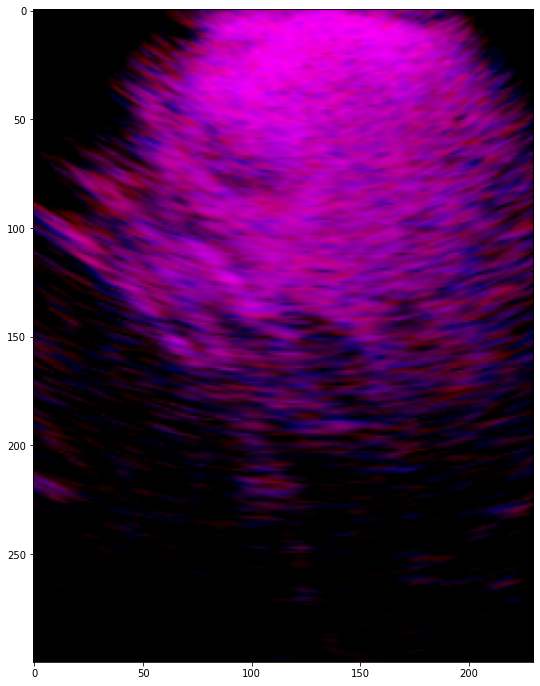

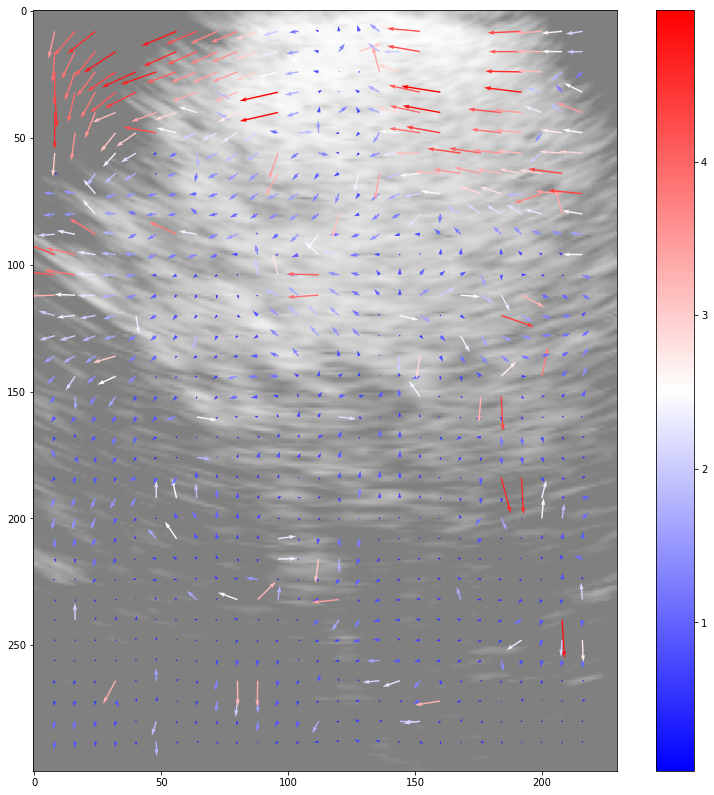

In [20]:
# for all cicles 
count = 1
frames=[]

for i in range(0,len(peaks)-1):
  a=peaks[i]
  b=peaks[i+1]
  
  x1=np.zeros((36,27))
  y1=np.zeros((36,27))
  u1=np.zeros((36,27))
  v1=np.zeros((36,27))
  s2n1=np.zeros((36,27))

  while count>= a and count<b:
    image2 = images[count+1,...]
    image2=image2[180:480,270:500,0]
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12,12))
    ax.imshow(np.stack([image1,0*image1, image2],axis=2))
    x,y,u,v,s2n = windef.simple_multipass(image1, image2, windows=(64,64,32,16))
    x1+=x
    y1+=y
    u1+=u
    v1+=v
    s2n1+=s2n
    valid = np.sqrt(u**2 + v**2) < 5
    fig, ax = plt.subplots(figsize=(14,14))
    im=ax.imshow(image1, cmap='gray', alpha=.5)
    cm = ax.quiver(x[valid],y[valid],u[valid],v[valid], np.sqrt(u[valid]**2+v[valid]**2), cmap='bwr')
    plt.colorbar(cm, orientation='vertical')
    plt.show()
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h,w,4))
    frames.append(rgba_arr)

    count += 1 
    image1 = image2.copy()
  
  x1=x1/(b-a)
  x_average[i-1,:,:]=x1
  y1=y1/(b-a)
  y_average[i-1,:,:]=y1
  u1=u1/(b-a)
  u_average[i-1,:,:]=u1
  v1=v1/(b-a)
  v_average[i-1,:,:]=v1
  s2n1=s2n1/(b-a)
  s2n_average[i-1,:,:]=s2n1


In [ ]:
block = amp.blocks.Imshow(frames)
t = np.linspace(0, 1, 10)
timeline = amp.Timeline(t,units='s', fps=2)
anim = amp.Animation([block], timeline)
anim.controls()
anim.save_gif('/content/drive/Shareddrives/echo_piv/repo/data/animation1_dicom')

In [22]:
print(y_average)


[[[288. 288. 288. ... 288. 288. 288.]
  [280. 280. 280. ... 280. 280. 280.]
  [272. 272. 272. ... 272. 272. 272.]
  ...
  [ 24.  24.  24. ...  24.  24.  24.]
  [ 16.  16.  16. ...  16.  16.  16.]
  [  8.   8.   8. ...   8.   8.   8.]]

 [[288. 288. 288. ... 288. 288. 288.]
  [280. 280. 280. ... 280. 280. 280.]
  [272. 272. 272. ... 272. 272. 272.]
  ...
  [ 24.  24.  24. ...  24.  24.  24.]
  [ 16.  16.  16. ...  16.  16.  16.]
  [  8.   8.   8. ...   8.   8.   8.]]

 [[288. 288. 288. ... 288. 288. 288.]
  [280. 280. 280. ... 280. 280. 280.]
  [272. 272. 272. ... 272. 272. 272.]
  ...
  [ 24.  24.  24. ...  24.  24.  24.]
  [ 16.  16.  16. ...  16.  16.  16.]
  [  8.   8.   8. ...   8.   8.   8.]]

 ...

 [[288. 288. 288. ... 288. 288. 288.]
  [280. 280. 280. ... 280. 280. 280.]
  [272. 272. 272. ... 272. 272. 272.]
  ...
  [ 24.  24.  24. ...  24.  24.  24.]
  [ 16.  16.  16. ...  16.  16.  16.]
  [  8.   8.   8. ...   8.   8.   8.]]

 [[288. 288. 288. ... 288. 288. 288.]
  [280. 280.